In [1]:
import openturns as ot
import numpy as np
import matplotlib.pyplot as plt
import sys 
import scipy.optimize as scpOpt

from stoOptProb import RiemannianStochasticOptimization
from normal import Normal
from matplotlib.colors import LinearSegmentedColormap

from pathlib import Path

# get the current directory
current_dir = Path.cwd()

# move back
parent_dir = current_dir.parent
file_path_1 = parent_dir / "Multivariate_case"

sys.path.append(str(file_path_1))

from truncatedDistribution import TruncatedDistribution  
from lognormal import LogNormal
from extendedtrnormal import ExtendedTrNormal
from extendedtrlognormal import ExtendedTrLogNormal
from jointdistribution import JointDistribution

AttributeError: module 'openturns' has no attribute 'JointDistribution'

#### Stochatistic Optimization on parametric families

Let $\mathcal F$ be a parametric family on $\mathbb R^d$ and $G:\mathbb R^d \to \mathbb R$ a map (here $d=1$). Maximizing the function $G$ on some domain $\Omega$ i.e.

$$\max_{x\in\Omega} \ G(x),$$

is similar to maximizing a quantile of the output on the parametric family

$$\max_{\theta} \ q_\alpha \big( G(X) | X\sim f_\theta\big).$$

This is specially true if the parametric family has distributions that can concentrate at a single point (like the normal family). An algorithm which iteratively builds 
distributions that converge to the optimum is given in the following and implemented
below. Let $f_0 \in \mathcal F$ be the initial distribution for the algorithm. Given 
the $k^{th}$ iteration $f_k \in \mathcal F$, $f_{k+1}$ is built using the following steps:

1. Sample $x_1,...,x_n$ from $f_k$,
2. Compute $G$ on the sample $y_i = G(x_i)$,
3. Sort the output values in increasing order: $\ y_{\sigma(1)}>\ldots>y_{\sigma(n)}$,
4. choose hyperparameters $u_1>\ldots>u_n$,
5. compute the weighted log-likelihood (Riemannian) gradient on the sample:
$$\mathbf{v}_{k+1} = \frac{1}{n} \sum_{i=1}^n u_i \nabla_{\theta} \log f_k(X_{\sigma(i)})$$
6. update the parameter using the Riemannian or Euclidean update:
$$f_{k+1} = \exp_{f_k} (\eta \mathbf{v}_{k+1}) \quad \quad \text{ or } \quad\quad \theta_{k+1} = \theta_k + \eta \mathbf{v}_{k+1} $$

This algorithm is described in the paper "Natural Evolution Strategies" T. Schaul et al. 2014. The hyperparameters are the weights $u_1,...,u_n$ and the gradient stepsize. We follow the recommendation from
the previous paper for choosing the hyperparameters.

In [5]:
# Define the objective function
def G(x_p):
    x = x_p[0]-6
    return [-0.005*(x**4 +10*x**3+20*x**2+x +2 +160) + 2]  # degree 4 polynomial function

h = ot.PythonFunction(1, 1, G)

# and compu*te the maximum
def g(x):
    return -G(x)[0]

min_G = scpOpt.minimize(g, 4, bounds=[(-2, 6)])
max_value_G = min_G.fun*(-1)
print(max_value_G)

1.9524849089306051


In [6]:

def poly(x):
    #if type(x)==ot.Point:
    
    if x<0.5:
        return 0
    
    return 3*(np.sin(x*10)/x - x + 4) 

def poly_ot(x):
    x = np.array(x)
    if x[0]<0.5:
        return [0]
    
    return [3*(np.sin(x[0]*10)/x[0] - x[0] + 4)] 

polyOT = ot.PythonFunction(1, 1, poly_ot)

s = ot.Normal(1).getSample(5)
print(polyOT([0.3]))



arr = np.linspace(0.5, 3.5, 100)
# plt.plot(arr, [poly(x) for x in arr])
# and compute the maximum
def g(x):
    return -poly(x)

min_poly = scpOpt.minimize(g, 0.7, bounds=[(0.5, 1)])
max_value_poly = min_poly.fun*(-1)
print(max_value_poly)

# def omega(alpha: float, array: np.ndarray):

#         N = len(array)
#         arange = np.arange(1, N+1)
#         arg = (arange + np.ones(N)/2)/N
#         omegas = arg >= alpha
#         sorted_index = np.argsort(np.argsort(array))
#         #print("weights =", omegas[sorted_index])
#         print(sum(omegas))
#         return omegas[sorted_index] #*1/sum(omegas)

# print(omega(0.73, np.arange(100)))

[0]
13.545273193547684


In [7]:
plt.style.use('seaborn-v0_8')

computing output values...

     [ y0      ]
 0 : [ 1.35327 ]
 1 : [ 1.33521 ]
 2 : [ 1.12229 ]
 3 : [ 1.21207 ]
 4 : [ 1.63286 ]
 5 : [ 1.12411 ]
 6 : [ 1.14456 ]
 7 : [ 1.16557 ]
 8 : [ 1.14745 ]
 9 : [ 1.1147  ]
10 : [ 1.21521 ]
11 : [ 1.44755 ]
12 : [ 1.11712 ]
13 : [ 1.17942 ]
14 : [ 1.14376 ]
15 : [ 1.11462 ]
16 : [ 1.11465 ]
17 : [ 1.24426 ]
18 : [ 1.1746  ]
19 : [ 1.11705 ]
20 : [ 1.16397 ]
21 : [ 1.1366  ]
22 : [ 1.27306 ]
23 : [ 1.22472 ]
24 : [ 1.11783 ]
25 : [ 1.11604 ]
26 : [ 1.29392 ]
27 : [ 1.11536 ]
28 : [ 1.18636 ]
29 : [ 1.11366 ]
30 : [ 1.14049 ]
31 : [ 1.12186 ]
32 : [ 1.18835 ]
33 : [ 1.20807 ]
34 : [ 1.15149 ]
35 : [ 1.87834 ]
36 : [ 1.128   ]
37 : [ 1.14596 ]
38 : [ 1.15802 ]
39 : [ 1.28727 ]
40 : [ 1.15392 ]
41 : [ 1.12688 ]
42 : [ 1.14573 ]
43 : [ 1.11966 ]
44 : [ 1.18395 ]
45 : [ 1.38982 ]
46 : [ 1.1462  ]
47 : [ 1.14446 ]
48 : [ 1.13236 ]
49 : [ 1.11381 ]
50 : [ 1.23266 ]
51 : [ 1.18442 ]
52 : [ 1.12868 ]
53 : [ 1.15948 ]
54 : [ 1.17671 ]
55 : [ 1.11836 ]
56 

<>:54: SyntaxWarning: invalid escape sequence '\e'
<>:54: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_70447/4169903808.py:54: SyntaxWarning: invalid escape sequence '\e'
  fig.suptitle(f"IGO-Q on a toy case (iterations={nbIter}, $n$={n_k}, $\\alpha$={[0.5, 0.75, 0.95]}, $\eta$={eta})", fontsize=27)


50%-quantile of the sample output: 1.1328548907137002
95%-quantile of the sample output: 1.3508980494951583

computing output values...

     [ y0      ]
 0 : [ 1.13004 ]
 1 : [ 1.17752 ]
 2 : [ 1.25169 ]
 3 : [ 1.11347 ]
 4 : [ 1.61505 ]
 5 : [ 1.11426 ]
 6 : [ 1.22702 ]
 7 : [ 1.14231 ]
 8 : [ 1.74813 ]
 9 : [ 1.11341 ]
10 : [ 1.13292 ]
11 : [ 1.55318 ]
12 : [ 1.1485  ]
13 : [ 1.50012 ]
14 : [ 1.12567 ]
15 : [ 1.11565 ]
16 : [ 1.22819 ]
17 : [ 1.1336  ]
18 : [ 1.12272 ]
19 : [ 1.14685 ]
20 : [ 1.1174  ]
21 : [ 1.17297 ]
22 : [ 1.13753 ]
23 : [ 1.12614 ]
24 : [ 1.1611  ]
25 : [ 1.27372 ]
26 : [ 1.11746 ]
27 : [ 1.11568 ]
28 : [ 1.13173 ]
29 : [ 1.12591 ]
30 : [ 1.11628 ]
31 : [ 1.25746 ]
32 : [ 1.12725 ]
33 : [ 1.114   ]
34 : [ 1.16222 ]
35 : [ 1.22209 ]
36 : [ 1.16904 ]
37 : [ 1.21889 ]
38 : [ 1.16879 ]
39 : [ 1.15462 ]
40 : [ 1.18932 ]
41 : [ 1.51538 ]
42 : [ 1.64315 ]
43 : [ 1.11388 ]
44 : [ 1.24283 ]
45 : [ 1.13868 ]
46 : [ 1.11345 ]
47 : [ 1.13564 ]
48 : [ 1.3474  ]
49 : [ 1.1159

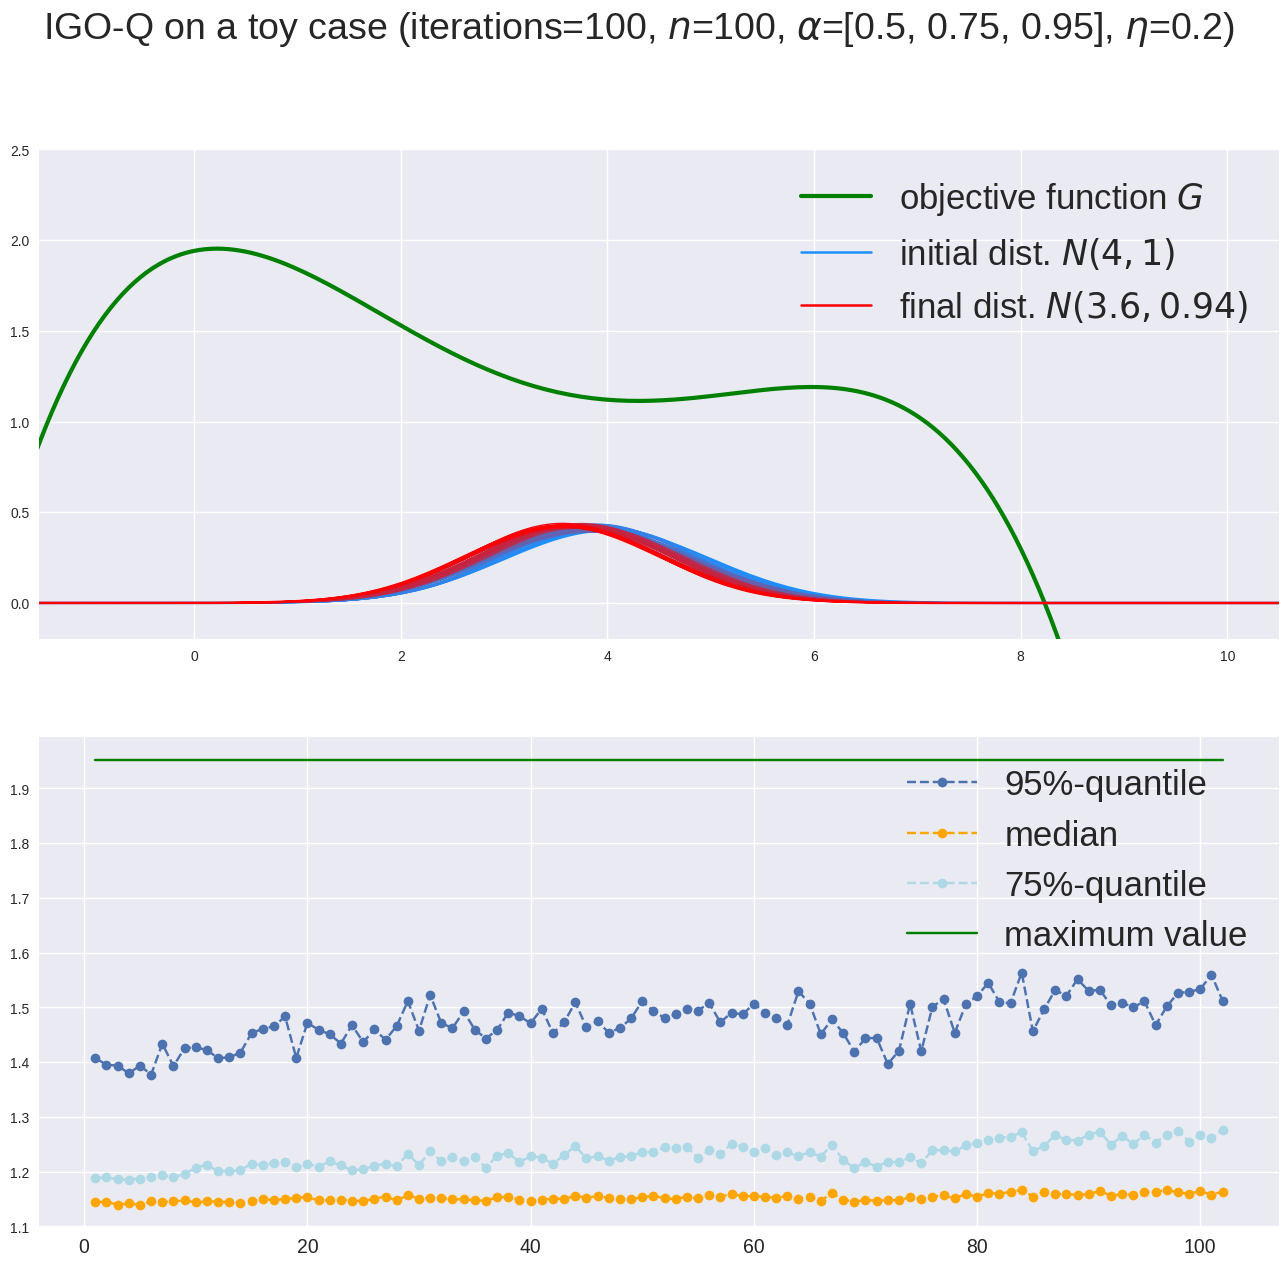

In [8]:
# starting distribution
m_0 = 4
s_0 = 1

margin = Normal(m_0, s_0)
margin.setDescription(ot.Description(['X1']))
f0 = JointDistribution([margin], ot.IndependentCopula(1))
f0.setDescription(ot.Description(['X1']))
# f0 = ExtendedTrNormal(k=0, s=1, lowerBound=-1, upperBound=1)
# f0 = Normal(m_0, s_0)
# f0 = TruncatedDistribution(Normal(0, 5), ot.Interval(-1, 1))

# stepsize
eta = 0.2

# number of total iterations (i.e. number of times the distribution is updated)
nbIter = 100


# sample size from the current distribution at each iteration
n_k = 100

# define the optimization problem 
opt_problem = RiemannianStochasticOptimization(h, f0, ['X1'], ['X1'], f0)

# quantile order
alpha = 0.05
#RiemannianStochasticOptimization._increasing_alpha(nbIter, "Bardou et al.")


# apply the algorithm and extract the iterations, the empirical mean and quantile at each iteration
iterations, Xsamples, Ysamples, _, _ = opt_problem.naturalEvolutionStrategy(
    fitnessShapingStr = "IGO_Q", eta=eta, nbIter=nbIter, n=n_k, fitnessParameter=alpha,
    sampleReuse=False, recycleDepth=5)

medians = []
quartiles= []
extquantiles = []
for f in iterations:
    s = f.getSample(1000)
    output = np.array(h(s)).transpose()[0]
    medians.append(np.quantile(output, 0.5))
    quartiles.append(np.quantile(output, 0.75))
    extquantiles.append(np.quantile(output, 0.95))

# empMedian = np.quantile(Ysamples, 0.5, axis=1)
# empQuant = np.quantile(Ysamples, 0.95, axis=1)

print('len iterations', len(iterations))
# plot the results
# plt.figure(figsize=(14,6))
fig, ax = plt.subplots(2, 1, figsize=(16,14))

fig.suptitle(f"IGO-Q on a toy case (iterations={nbIter}, $n$={n_k}, $\\alpha$={[0.5, 0.75, 0.95]}, $\eta$={eta})", fontsize=27)

ax[0].grid('True')
#colors = [(0.1, p, 0.) for p in np.linspace(0.3,0.8, len(iterations), endpoint=True)]
# colors = [(0.7, 0.2, p) for p in np.linspace(0.4,1, len(iterations), endpoint=True)]
colors = LinearSegmentedColormap.from_list("custom", ["dodgerblue", "red"], N=nbIter)

X = np.linspace(-2,15,300)
ax[0].set_ylim(-0.2,2.5)
ax[0].set_xlim(-1.5,10.5)
ax[0].plot(X, [G([x])[0] for x in X], color='green', lw=3, label = 'objective function $G$')


ax[0].plot(X, [iterations[0].computePDF(x) for x in X], color = "dodgerblue", lw=1.8, label=f"initial dist. $N({m_0},{s_0})$")
for i, f in enumerate(iterations[1:]):
    #plot the iterations
    ax[0].plot(X, [f.computePDF(x) for x in X], color=colors(i/nbIter), lw=1)
    # ax[0].scatter(np.array(Xsamples)[i,:], np.zeros(n_k), color=colors(i/nbIter))


# for sample in samples:
#     ax[0].scatter(sample, np.zeros(len(sample)),  color=colors[i])
m_f = iterations[-1].getParameter()[0][0]
s_f = iterations[-1].getParameter()[0][1]

ax[0].plot(X, [iterations[-1].computePDF(x) for x in X], color = "red", lw=1.8, label=f"final dist. $N({m_f:.2},{s_f:.2})$", )

ax[0].legend(fontsize=25)
#ax[0].savefig("/home/bketema/Downloads/sto_opt.jpeg", dpi=600, bbox_inches='tight')
# ax[0].show();

ax[1].grid(True)
arange = np.arange(1, len(iterations)+1)
ax[1].plot(arange, extquantiles, "o--", label=f"{int(95)}%-quantile")
ax[1].plot(arange, medians, "o--",label="median", color="orange")
ax[1].plot(arange, quartiles, "o--", label=f"{int(75)}%-quantile", color="lightblue")


ax[1].plot(arange, np.ones(len(iterations))*max_value_G, label="maximum value", color="green")
#ax[1].set_title(f"Evolution of empirical mean and {int(95)}%-quantile along the iterates", fontsize=30)
ax[1].tick_params(axis='x', labelsize=14)  # x-axis font size
#ax[1].ylim(-0.2, 2.2)
#ax[1].savefig("/home/bketema/Downloads/quant_evol.jpeg", dpi=600, bbox_inches='tight')
ax[1].legend(fontsize=25)

# fig.savefig("/home/bketema/Downloads/Figures_ProbNum/IGO_2.pdf", dpi=600, bbox_inches='tight')

<>:28: SyntaxWarning: invalid escape sequence '\e'
<>:28: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_70447/3442657277.py:28: SyntaxWarning: invalid escape sequence '\e'
  fig.suptitle(f"IGO-Q on a toy case (iterations={nbIter}, $n$={n_k}, $\eta$={eta}) with different $\\alpha$", fontsize=22, y=1.03)


computing output values...

     [ y0      ]
 0 : [ 1.13177 ]
 1 : [ 1.12227 ]
 2 : [ 1.11408 ]
 3 : [ 1.11807 ]
 4 : [ 1.5321  ]
 5 : [ 1.12919 ]
 6 : [ 1.12645 ]
 7 : [ 1.11647 ]
 8 : [ 1.45811 ]
 9 : [ 1.1138  ]
10 : [ 1.12168 ]
11 : [ 1.1848  ]
12 : [ 1.14096 ]
13 : [ 1.41115 ]
14 : [ 1.21744 ]
15 : [ 1.11373 ]
16 : [ 1.24531 ]
17 : [ 1.39967 ]
18 : [ 1.12255 ]
19 : [ 1.31442 ]
20 : [ 1.16934 ]
21 : [ 1.13911 ]
22 : [ 1.48649 ]
23 : [ 1.22006 ]
24 : [ 1.11508 ]
25 : [ 1.13446 ]
26 : [ 1.27416 ]
27 : [ 1.27359 ]
28 : [ 1.11339 ]
29 : [ 1.136   ]
30 : [ 1.16641 ]
31 : [ 1.18278 ]
32 : [ 1.16175 ]
33 : [ 1.11582 ]
34 : [ 1.11888 ]
35 : [ 1.14975 ]
36 : [ 1.1178  ]
37 : [ 1.11661 ]
38 : [ 1.14196 ]
39 : [ 1.18643 ]
40 : [ 1.12203 ]
41 : [ 1.18693 ]
42 : [ 1.16327 ]
43 : [ 1.21128 ]
44 : [ 1.13712 ]
45 : [ 1.11747 ]
46 : [ 1.22128 ]
47 : [ 1.20817 ]
48 : [ 1.19553 ]
49 : [ 1.12455 ]
50 : [ 1.1134  ]
51 : [ 1.12405 ]
52 : [ 1.18391 ]
53 : [ 1.13938 ]
54 : [ 1.20897 ]
55 : [ 1.11392 ]
56 

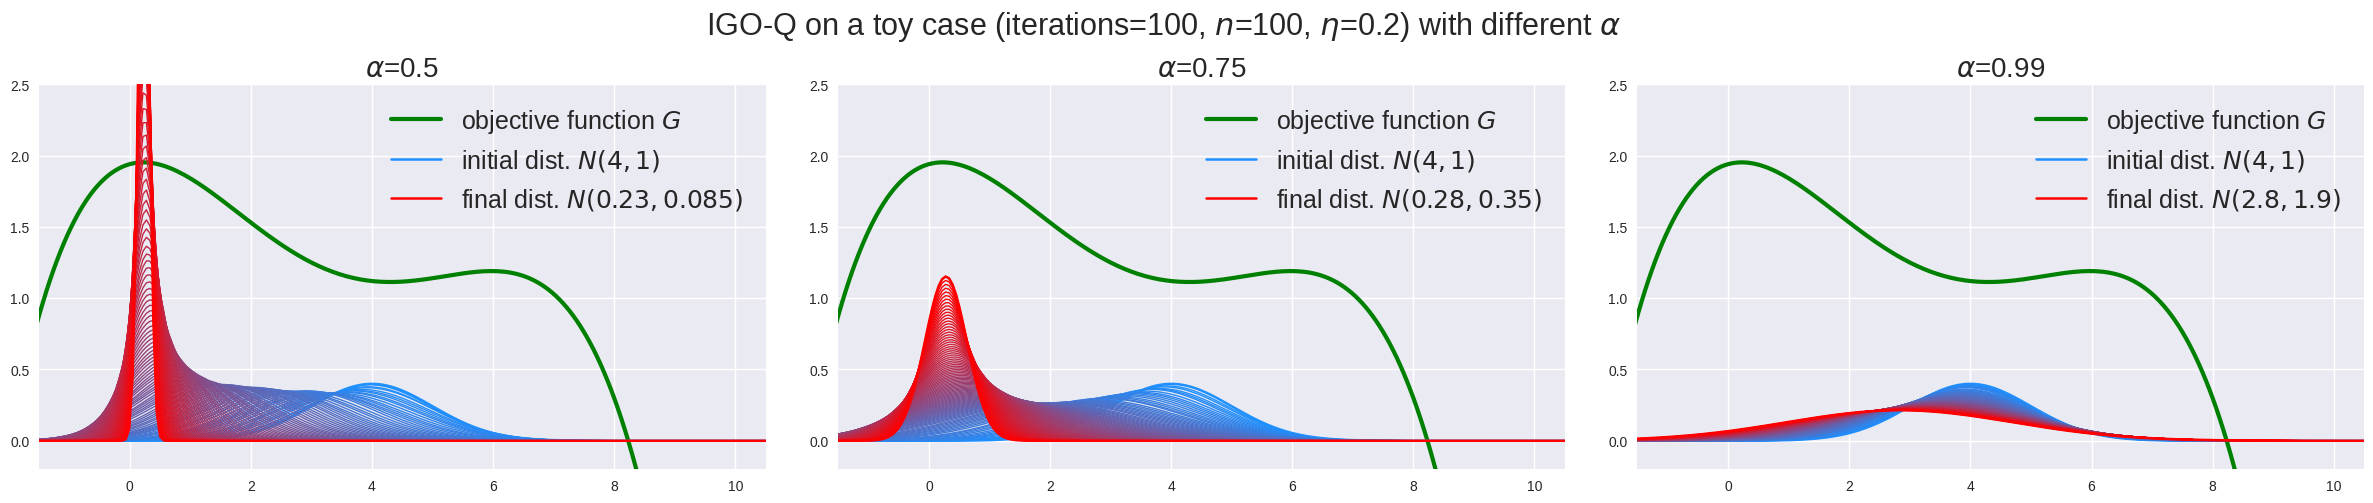

In [9]:
# starting distribution
m_0 = 4
s_0 = 1

margin = Normal(m_0, s_0)
margin.setDescription(ot.Description(['X1']))
f0 = JointDistribution([margin], ot.IndependentCopula(1))
f0.setDescription(ot.Description(['X1']))
# f0 = ExtendedTrNormal(k=0, s=1, lowerBound=-1, upperBound=1)
# f0 = Normal(m_0, s_0)
# f0 = TruncatedDistribution(Normal(0, 5), ot.Interval(-1, 1))

# stepsize
eta = 0.2

# number of total iterations (i.e. number of times the distribution is updated)
nbIter = 100


# sample size from the current distribution at each iteration
n_k = 100

# define the optimization problem 
opt_problem = RiemannianStochasticOptimization(h, f0, ['X1'], ['X1'], f0)

fig, ax = plt.subplots(1, 3, figsize=(30,5))

fig.suptitle(f"IGO-Q on a toy case (iterations={nbIter}, $n$={n_k}, $\eta$={eta}) with different $\\alpha$", fontsize=22, y=1.03)
fig.subplots_adjust(wspace=0.1)
fig.subplots_adjust(wspace=0.1)  

Alpha = [0.5, 0.75, 0.99]
for l, alpha in enumerate(Alpha):
# quantile order

    # apply the algorithm and extract the iterations, the empirical mean and quantile at each iteration
    iterations, Xsamples, Ysamples, _, _ = opt_problem.naturalEvolutionStrategy(
        fitnessShapingStr = "IGO_Q", eta=eta, nbIter=nbIter, n=n_k, fitnessParameter=alpha,
        sampleReuse=False, recycleDepth=5)

    # medians = []
    # quartiles= []
    # extquantiles = []
    # for f in iterations:
    #     s = f.getSample(1000)
    #     output = np.array(h(s)).transpose()[0]
    #     medians.append(np.quantile(output, 0.5))
    #     quartiles.append(np.quantile(output, 0.75))
    #     extquantiles.append(np.quantile(output, 0.95))

    # empMedian = np.quantile(Ysamples, 0.5, axis=1)
    # empQuant = np.quantile(Ysamples, 0.95, axis=1)

    # plot the results

    colors = LinearSegmentedColormap.from_list("custom", ["dodgerblue", "red"], N=nbIter)
    ax[l].set_title(f"$\\alpha$={alpha}", fontsize=20)

    X = np.linspace(-2,15,300)
    ax[l].set_ylim(-0.2,2.5)
    ax[l].set_xlim(-1.5,10.5)
    ax[l].plot(X, [G([x])[0] for x in X], color='green', lw=3, label = 'objective function $G$')

    ax[l].plot(X, [iterations[0].computePDF(x) for x in X], color = "dodgerblue", lw=1.8, label=f"initial dist. $N({m_0},{s_0})$")
    for i, f in enumerate(iterations[1:]):
        #plot the iterations
        ax[l].plot(X, [f.computePDF(x) for x in X], color=colors(i/nbIter), lw=1)
        # ax[0].scatter(np.array(Xsamples)[i,:], np.zeros(n_k), color=colors(i/nbIter))

    # for sample in samples:
    #     ax[0].scatter(sample, np.zeros(len(sample)),  color=colors[i])
    m_f = iterations[-1].getParameter()[0][0]
    s_f = iterations[-1].getParameter()[0][1]

    ax[l].plot(X, [iterations[-1].computePDF(x) for x in X], color = "red", lw=1.8, label=f"final dist. $N({m_f:.2},{s_f:.2})$", )

    ax[l].legend(fontsize=18)
    #ax[0].savefig("/home/bketema/Downloads/sto_opt.jpeg", dpi=600, bbox_inches='tight')
    # ax[0].show();
#fig.savefig("/home/bketema/Python workspace/Stochastic Optimization/figures_chap_optim/chap_optim_different_alpha.pdf", dpi=600, bbox_inches='tight')

computing output values...

     [ y0      ]
 0 : [ 1.21282 ]
 1 : [ 1.1699  ]
 2 : [ 1.1671  ]
 3 : [ 1.25743 ]
 4 : [ 1.47856 ]
 5 : [ 1.11362 ]
 6 : [ 1.14691 ]
 7 : [ 1.56066 ]
 8 : [ 1.17091 ]
 9 : [ 1.12479 ]
10 : [ 1.11434 ]
11 : [ 1.1345  ]
12 : [ 1.20866 ]
13 : [ 1.26613 ]
14 : [ 1.15659 ]
15 : [ 1.1485  ]
16 : [ 1.11463 ]
17 : [ 1.14423 ]
18 : [ 1.12693 ]
19 : [ 1.18955 ]
20 : [ 1.26533 ]
21 : [ 1.14648 ]
22 : [ 1.22106 ]
23 : [ 1.12701 ]
24 : [ 1.14999 ]
25 : [ 1.38751 ]
26 : [ 1.13242 ]
27 : [ 1.26191 ]
28 : [ 1.11368 ]
29 : [ 1.13963 ]
30 : [ 1.14798 ]
31 : [ 1.11368 ]
32 : [ 1.12743 ]
33 : [ 1.20074 ]
34 : [ 1.16795 ]
35 : [ 1.44749 ]
36 : [ 1.1234  ]
37 : [ 1.29163 ]
38 : [ 1.14952 ]
39 : [ 1.14959 ]
40 : [ 1.11994 ]
41 : [ 1.2876  ]
42 : [ 1.23813 ]
43 : [ 1.24366 ]
44 : [ 1.16064 ]
45 : [ 1.12205 ]
46 : [ 1.14191 ]
47 : [ 1.22853 ]
48 : [ 1.21921 ]
49 : [ 1.32734 ]
50 : [ 1.50686 ]
51 : [ 1.11465 ]
52 : [ 1.13547 ]
53 : [ 1.1553  ]
54 : [ 1.18814 ]
55 : [ 1.1799  ]
56 

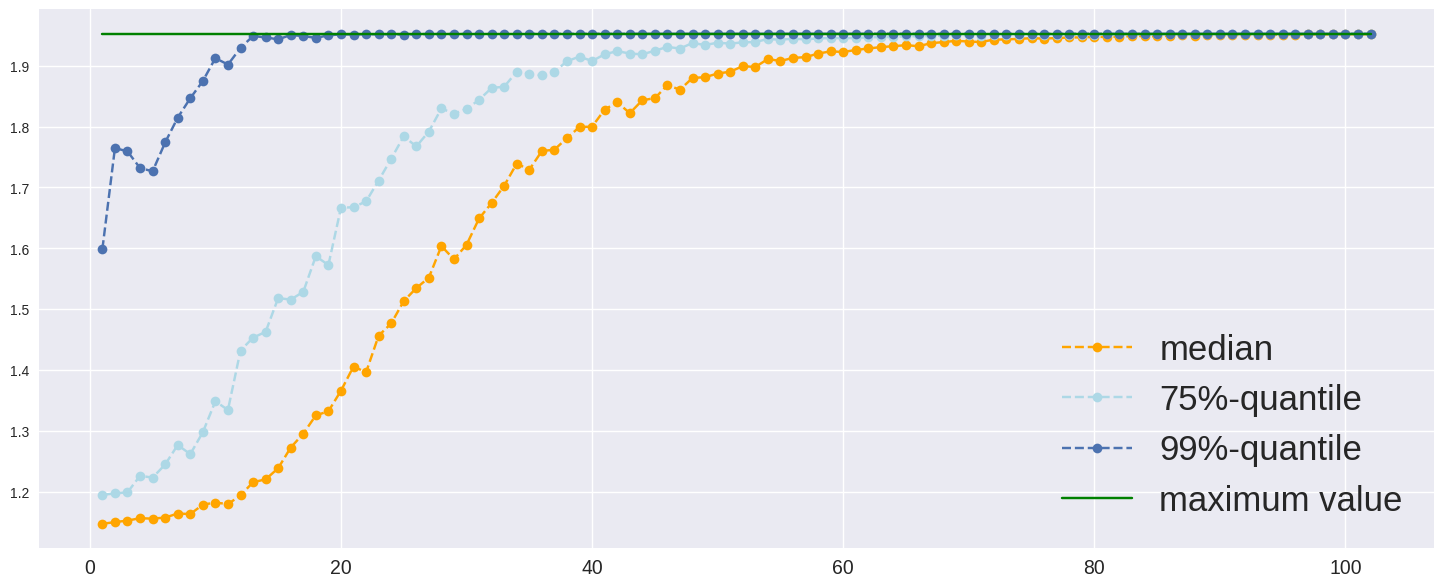

In [10]:
alpha = 0.5
# quantile order

# apply the algorithm and extract the iterations, the empirical mean and quantile at each iteration
iterations, Xsamples, Ysamples, _, _ = opt_problem.naturalEvolutionStrategy(
    fitnessShapingStr = "IGO_Q", eta=eta, nbIter=nbIter, n=n_k, fitnessParameter=alpha,
    sampleReuse=False, recycleDepth=5)

medians = []
quartiles= []
extquantiles = []
for f in iterations:
    s = f.getSample(1000)
    output = np.array(h(s)).transpose()[0]
    medians.append(np.quantile(output, 0.5))
    quartiles.append(np.quantile(output, 0.75))
    extquantiles.append(np.quantile(output, 0.99))



# plot the results
plt.figure(figsize=(18, 7))
# plt.grid(True)
arange = np.arange(1, len(iterations)+1)
plt.plot(arange, medians, "o--",label="median", color="orange")
plt.plot(arange, quartiles, "o--", label=f"{int(75)}%-quantile", color="lightblue")
plt.plot(arange, extquantiles, "o--", label=f"{int(99)}%-quantile")


plt.plot(arange, np.ones(len(iterations))*max_value_G, label="maximum value", color="green")
#plt.set_title(f"Evolution of empirical mean and {int(95)}%-quantile along the iterates", fontsize=30)
plt.tick_params(axis='x', labelsize=14)  # x-axis font size
#plt.ylim(-0.2, 2.2)
#plt.savefig("/home/bketema/Downloads/quant_evol.jpeg", dpi=600, bbox_inches='tight')
plt.legend(fontsize=25)


# colors = LinearSegmentedColormap.from_list("custom", ["dodgerblue", "red"], N=nbIter)
# ax[l].set_title(f"$\\alpha$={alpha}", fontsize=20)

# X = np.linspace(-2,15,300)
# ax[l].set_ylim(-0.2,2.5)
# ax[l].set_xlim(-1.5,10.5)
# ax[l].plot(X, [G([x])[0] for x in X], color='green', lw=3, label = 'objective function $G$')

# ax[l].plot(X, [iterations[0].computePDF(x) for x in X], color = "dodgerblue", lw=1.8, label=f"initial dist. $N({m_0},{s_0})$")
# for i, f in enumerate(iterations[1:]):
#     #plot the iterations
#     ax[l].plot(X, [f.computePDF(x) for x in X], color=colors(i/nbIter), lw=1)
#     # ax[0].scatter(np.array(Xsamples)[i,:], np.zeros(n_k), color=colors(i/nbIter))

# # for sample in samples:
# #     ax[0].scatter(sample, np.zeros(len(sample)),  color=colors[i])
# m_f = iterations[-1].getParameter()[0][0]
# s_f = iterations[-1].getParameter()[0][1]

# ax[l].plot(X, [iterations[-1].computePDF(x) for x in X], color = "red", lw=1.8, label=f"final dist. $N({m_f:.2},{s_f:.2})$", )

# ax[l].legend(fontsize=18)
plt.savefig("/home/bketema/Python workspace/Stochastic Optimization/figures_chap_optim/chap_optim_quantiles_for_different_alpha.pdf", dpi=600, bbox_inches='tight')# # ax[0].show();


computing output values...

     [ y0      ]
 0 : [ 2.64426 ]
 1 : [ 2.06408 ]
 2 : [ 2.04219 ]
 3 : [ 2.02826 ]
 4 : [ 2.00972 ]
 5 : [ 2.20338 ]
 6 : [ 2.15911 ]
 7 : [ 2.0659  ]
 8 : [ 2.09793 ]
 9 : [ 2.00544 ]
10 : [ 2.31649 ]
11 : [ 2.53127 ]
12 : [ 2.42219 ]
13 : [ 2.31927 ]
14 : [ 2.01255 ]
15 : [ 2.15556 ]
16 : [ 2.63645 ]
17 : [ 2.0472  ]
18 : [ 2.14299 ]
19 : [ 2.64168 ]
20 : [ 2.58636 ]
21 : [ 2.07265 ]
22 : [ 2.08792 ]
23 : [ 2.53693 ]
24 : [ 2.00745 ]
25 : [ 2.43696 ]
26 : [ 2.17764 ]
27 : [ 2.33281 ]
28 : [ 2.53311 ]
29 : [ 2.3825  ]
output values =
       [ y0      ]
 0 : [ 2.64426 ]
 1 : [ 2.06408 ]
 2 : [ 2.04219 ]
 3 : [ 2.02826 ]
 4 : [ 2.00972 ]
 5 : [ 2.20338 ]
 6 : [ 2.15911 ]
 7 : [ 2.0659  ]
 8 : [ 2.09793 ]
 9 : [ 2.00544 ]
10 : [ 2.31649 ]
11 : [ 2.53127 ]
12 : [ 2.42219 ]
13 : [ 2.31927 ]
14 : [ 2.01255 ]
15 : [ 2.15556 ]
16 : [ 2.63645 ]
17 : [ 2.0472  ]
18 : [ 2.14299 ]
19 : [ 2.64168 ]
20 : [ 2.58636 ]
21 : [ 2.07265 ]
22 : [ 2.08792 ]
23 : [ 2.53693 ]
24

<>:37: SyntaxWarning: invalid escape sequence '\e'
<>:37: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_70447/1824447420.py:37: SyntaxWarning: invalid escape sequence '\e'
  fig.suptitle(f"IGO-Q on a toy case (iterations={nbIter}, $n$={n_k}, $\\alpha$={alpha}, $\eta$={eta})",fontsize=30)


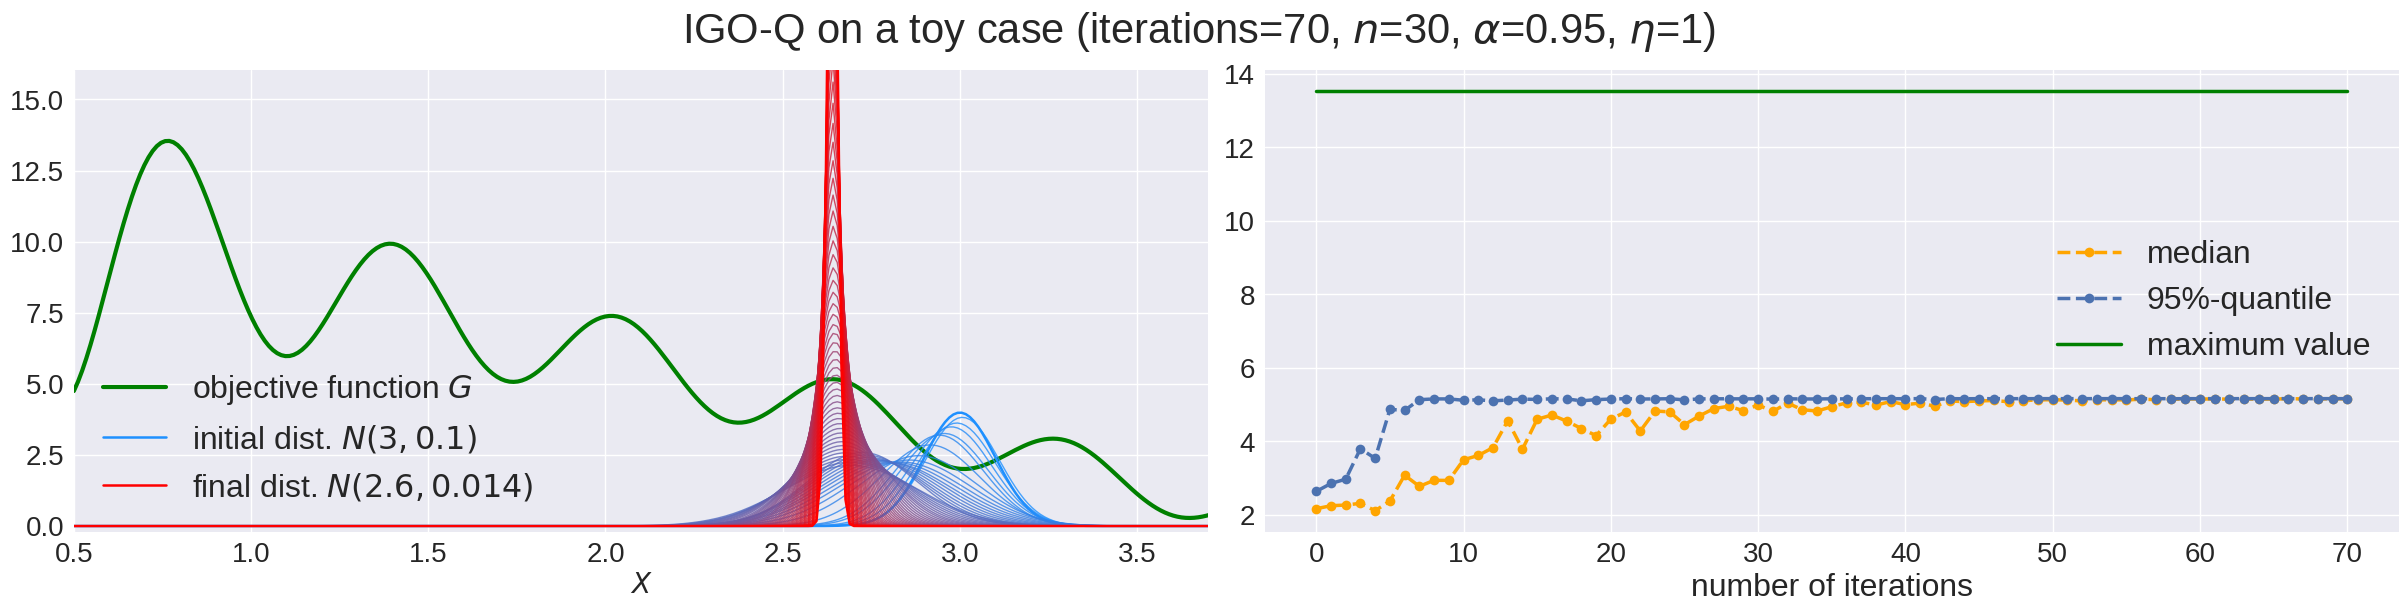

In [11]:
plt.style.use('seaborn-v0_8')

# starting distribution
m_0 = 3
s_0 = 0.1
f0 = JointDistribution([Normal(m_0, s_0)], ot.IndependentCopula(1) ) # lowerBound=-1, upperBound=1)

# stepsize
eta = 1

# number of total iterations (i.e. number of times the distribution is updated)
nbIter = 70

# sample size from the current distribution at each iteration
n_k = 30

# define the optimization problem 
opt_problem = RiemannianStochasticOptimization(polyOT, f0, ['X0'], ['X0'])

# quantile order
alpha = 0.95

# apply the algorithm and extract the iterations, the empirical mean and quantile at each iteration
iterations, _, Ysamples, _, _ = opt_problem.naturalEvolutionStrategy(
    eta=eta, nbIter=nbIter, n=n_k, fitnessShapingStr="IGO_Q", fitnessParameter=alpha
    )

empMedian = np.quantile(Ysamples, 0.5, axis=1)
empQuant = np.quantile(Ysamples, alpha, axis=1)



# plot the results
# plt.figure(figsize=(14,6))
fig, ax = plt.subplots(1, 2, figsize=(30, 6))

fig.suptitle(f"IGO-Q on a toy case (iterations={nbIter}, $n$={n_k}, $\\alpha$={alpha}, $\eta$={eta})",fontsize=30)

plt.subplots_adjust(wspace=0.05)  

ax[0].grid('True')
colors = LinearSegmentedColormap.from_list("custom", ["dodgerblue", "red"], N=nbIter)

X = np.linspace(0.5,4,300)
ax[0].set_ylim(-0.2,max_value_poly+2.5)
ax[0].set_xlim(0.5, 3.7)
ax[0].plot(X, [poly(x) for x in X], color='green', lw=3, label = 'objective function $G$')

ax[0].set_xlabel(xlabel=f"$X$", fontsize=20)
ax[0].tick_params(axis='x', labelsize=20)  # x-axis font size
ax[0].tick_params(axis='y', labelsize=20)


ax[0].plot(X, [iterations[0].computePDF(x) for x in X], color = "dodgerblue", lw=1.8, label=f"initial dist. $N({m_0},{s_0})$")

for i, f in enumerate(iterations[1:-1]):
    #plot the iterations
    ax[0].plot(X, [f.computePDF(x) for x in X], color=colors(i/nbIter), lw=1, alpha=0.8)
    # ax[0].scatter(np.array(Xsamples)[i,:], np.zeros(n_k), color=colors(i/nbIter))

# for sample in samples:
#     ax[0].scatter(sample, np.zeros(len(sample)),  color=colors[i])
m_f = iterations[-1].getParameter()[0][0]
s_f = iterations[-1].getParameter()[0][1]

ax[0].plot(X, [iterations[-1].computePDF(x) for x in X], color = "red", lw=1.8, label=f"final dist. $N({m_f:.2},{s_f:.2})$")
ax[0].legend(fontsize=23)


ax[1].grid(True)
arange = np.arange(0, len(iterations)-1)
ax[1].plot(arange, empMedian, "o--",label="median", color="orange",lw=2.5)
ax[1].plot(arange, empQuant, "o--", label=f"{int(100*alpha)}%-quantile", lw=2.5)
ax[1].plot(arange, np.ones(len(iterations)-1)*max_value_poly, label="maximum value", color="green", lw=2.5)
#ax[1].set_title(f"Evolution of empirical mean and {int(100*alpha)}%-quantile along the iterates", fontsize=30)
ax[1].tick_params(axis='x', labelsize=20)  # x-axis font size
ax[1].tick_params(axis='y', labelsize=20)
ax[1].set_xlabel(xlabel=f"number of iterations", fontsize=23)

ax[1].legend(fontsize=23)

#fig.savefig("/home/bketema/Python workspace/Stochastic Optimization/figures_chap_optim/chap_optim_local_minima_stuck.pdf", dpi=600, bbox_inches='tight')

<>:35: SyntaxWarning: invalid escape sequence '\e'
<>:35: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_70447/3119882051.py:35: SyntaxWarning: invalid escape sequence '\e'
  plt.title(f"IGO-Q on a toy case (iterations={nbIter}, $n$={n_k}, $\\alpha$={[0.5, 0.75, 0.95]}, $\eta$={eta})",fontsize=30)


len alpha 251
computing output values...

     [ y0       ]
 0 : [ 2.84857  ]
 1 : [ 4.0439   ]
 2 : [ 2.9805   ]
 3 : [ 3.06476  ]
 4 : [ 2.03673  ]
 5 : [ 2.25306  ]
 6 : [ 2.87274  ]
 7 : [ 3.07251  ]
 8 : [ 4.59977  ]
 9 : [ 2.26685  ]
10 : [ 5.13697  ]
11 : [ 2.87752  ]
12 : [ 3.03699  ]
13 : [ 2.91058  ]
14 : [ 3.07145  ]
15 : [ 2.122    ]
16 : [ 2.08816  ]
17 : [ 2.90621  ]
18 : [ 2.0103   ]
19 : [ 5.09101  ]
20 : [ 2.35947  ]
21 : [ 2.66625  ]
22 : [ 2.07689  ]
23 : [ 2.46821  ]
24 : [ 2.24518  ]
25 : [ 0.391214 ]
26 : [ 2.0338   ]
27 : [ 5.16089  ]
28 : [ 3.0695   ]
29 : [ 1.88118  ]
output values =
       [ y0       ]
 0 : [ 2.84857  ]
 1 : [ 4.0439   ]
 2 : [ 2.9805   ]
 3 : [ 3.06476  ]
 4 : [ 2.03673  ]
 5 : [ 2.25306  ]
 6 : [ 2.87274  ]
 7 : [ 3.07251  ]
 8 : [ 4.59977  ]
 9 : [ 2.26685  ]
10 : [ 5.13697  ]
11 : [ 2.87752  ]
12 : [ 3.03699  ]
13 : [ 2.91058  ]
14 : [ 3.07145  ]
15 : [ 2.122    ]
16 : [ 2.08816  ]
17 : [ 2.90621  ]
18 : [ 2.0103   ]
19 : [ 5.09101  ]
20 :

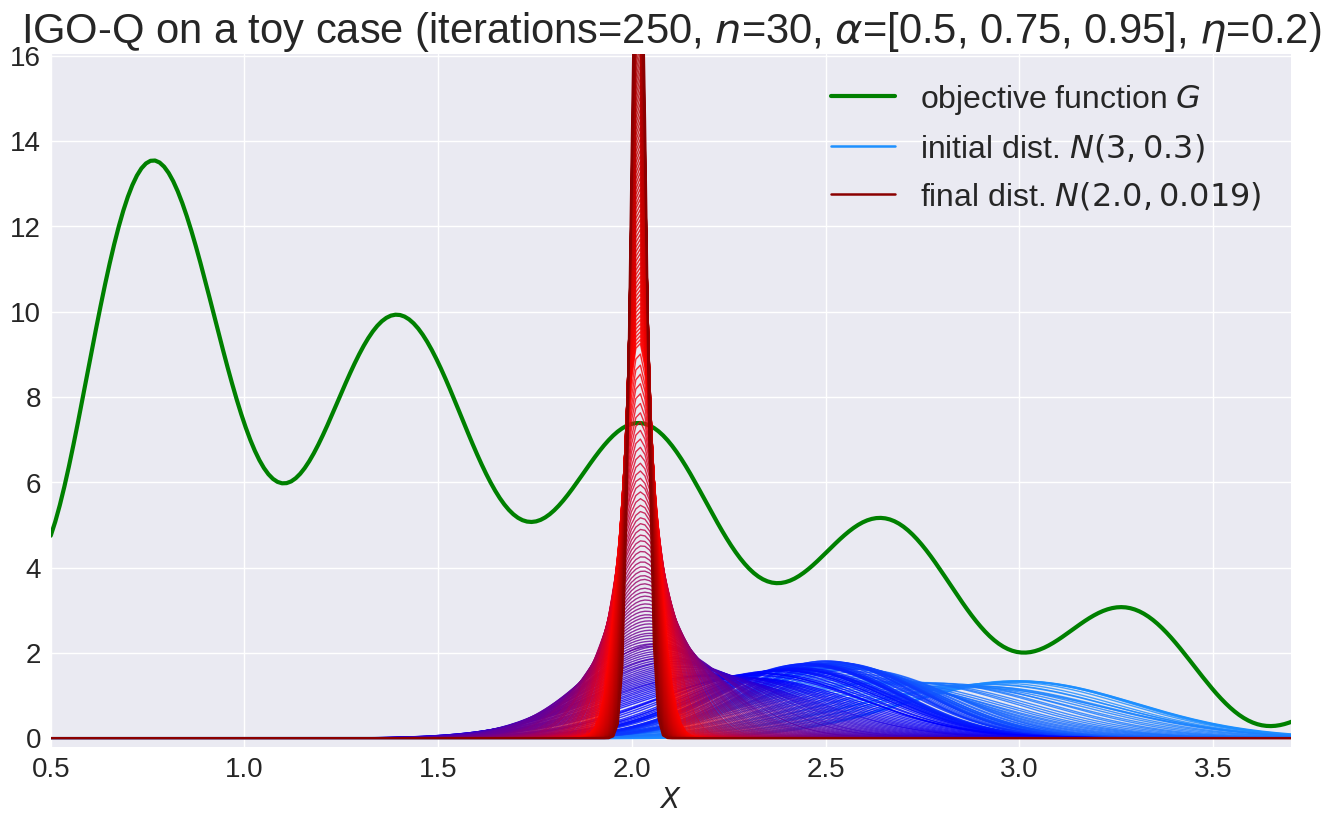

In [12]:
plt.style.use('seaborn-v0_8')

# starting distribution
m_0 = 3
s_0 = 0.3
f0 = JointDistribution([Normal(m_0, s_0)], ot.IndependentCopula(1) ) # lowerBound=-1, upperBound=1)

# stepsize
eta = 0.2
# number of total iterations (i.e. number of times the distribution is updated)
nbIter = 250

# sample size from the current distribution at each iteration
n_k = 30

# define the optimization problem 
opt_problem = RiemannianStochasticOptimization(polyOT, f0, ['X0'], ['X0'])

# quantile order
alpha = RiemannianStochasticOptimization._increasing_alpha(nbIter, "Bardou et al.")
print("len alpha", len(alpha))
# apply the algorithm and extract the iterations, the empirical mean and quantile at each iteration
iterations, _, Ysamples, _, _ = opt_problem.naturalEvolutionStrategy(
    eta=eta, nbIter=nbIter, n=n_k, fitnessShapingStr="IGO_Q", fitnessParameter=alpha
    )

empMedian = np.quantile(Ysamples, 0.5, axis=1)
empQuant = np.quantile(Ysamples, alpha, axis=1)


# plot the results
# plt.figure(figsize=(14,6))
plt.figure(figsize=(16, 9))

plt.title(f"IGO-Q on a toy case (iterations={nbIter}, $n$={n_k}, $\\alpha$={[0.5, 0.75, 0.95]}, $\eta$={eta})",fontsize=30)

plt.grid('True')
colors = LinearSegmentedColormap.from_list("custom", ["dodgerblue", "blue", "red", "darkred"], N=nbIter)

X = np.linspace(0.5,4,300)
plt.ylim(-0.2,max_value_poly+2.5)
plt.xlim(0.5, 3.7)
plt.plot(X, [poly(x) for x in X], color='green', lw=3, label = 'objective function $G$')

plt.xlabel(xlabel=f"$X$", fontsize=20)
plt.tick_params(axis='x', labelsize=20)  # x-axis font size
plt.tick_params(axis='y', labelsize=20)


plt.plot(X, [iterations[0].computePDF(x) for x in X], color = "dodgerblue", lw=1.8, label=f"initial dist. $N({m_0},{s_0})$")

for i, f in enumerate(iterations[1:-1]):
    #plot the iterations
    plt.plot(X, [f.computePDF(x) for x in X], color=colors(i/nbIter), lw=1, alpha=0.8)
    # plt.scatter(np.array(Xsamples)[i,:], np.zeros(n_k), color=colors(i/nbIter))

# for sample in samples:
#     plt.scatter(sample, np.zeros(len(sample)),  color=colors[i])
m_f = iterations[-1].getParameter()[0][0]
s_f = iterations[-1].getParameter()[0][1]

plt.plot(X, [iterations[-1].computePDF(x) for x in X], color = "darkred", lw=1.8, label=f"final dist. $N({m_f:.2},{s_f:.2})$")
plt.legend(fontsize=23)

fig.savefig("/home/bketema/Python workspace/Stochastic Optimization/figures_chap_optim/chap_optim_increasing_alpha.pdf", dpi=600, bbox_inches='tight')

In [13]:
# Define the objective function
def G(x_p):
    x = x_p[0]-6
    return [-0.005*(x**4 +10*x**3+20*x**2+x +2 +160) + 2]  # degree 4 polynomial function

h = ot.PythonFunction(1, 1, G)

margin = Normal(m_0, s_0)
margin.setDescription(ot.Description(['X1']))
f0 = JointDistribution([margin], ot.IndependentCopula(1))
f0.setDescription(ot.Description(['X1']))
# f0 = ExtendedTrNormal(k=0, s=1, lowerBound=-1, upperBound=1)
# f0 = Normal(m_0, s_0)
# f0 = TruncatedDistribution(Normal(0, 5), ot.Interval(-1, 1))

# stepsize
eta = 2

# number of total iterations (i.e. number of times the distribution is updated)
nbIter = 20

# sample size from the current distribution at each iteration
n_k = 5

# define the optimization problem 
opt_problem = RiemannianStochasticOptimization(h, f0, ['X1'], ['X1'], f0)

sampling_dist=JointDistribution([Normal(10, 2)], ot.IndependentCopula(1))

opt_problem.superquantileSGD(sampling_dist, eta=0.5, nbIter=50, alpha=0.75, q0=10)

k 1
[class=Point name=Unnamed dimension=2 values=[10,2], class=Point name=Unnamed dimension=0 values=[]]
    [ X0    ]
0 : [ 7.298 ]


TypeError: InvalidArgumentException : Marginal X1 not found

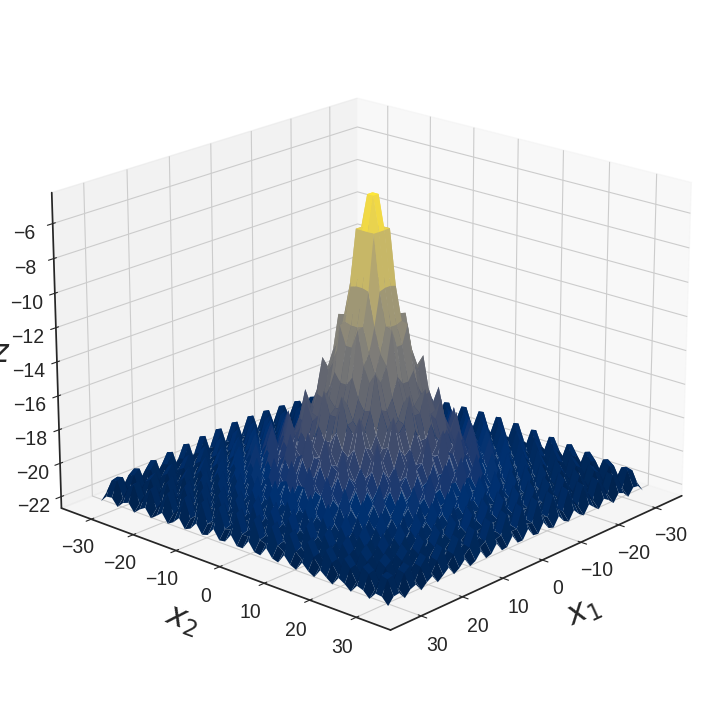

In [ ]:
def ackley(X, d=3, a=20, b=0.2, c=2*np.pi):
    """
    Compute the Ackley function (function obtained from ChatGPT).

    Parameters
    ----------
    x : array-like
        Input vector (list or numpy array)
    a, b, c : float, optional
        Ackley function parameters (default: 20, 0.2, 2π)

    Returns
    -------
    float
        Function value f(x)
    """
    x = np.array(X)
    d = x.size
    sum_sq = np.sum(x ** 2)
    sum_cos = np.sum(np.cos(c*x))
    
    term1 = -a * np.exp(-b * np.sqrt(sum_sq / d))
    term2 = -np.exp(sum_cos / d)
    
    return [-(term1 + term2 + a + np.e)]


# define a grid 
meshsize=50
lim = 32.5
x1 = np.linspace(-lim, lim, meshsize)
x2 = np.linspace(-lim, lim, meshsize)

X1, X2 = np.meshgrid(x1, x2)

Z = np.zeros((meshsize, meshsize))

for i in range(meshsize):
    for j in range(meshsize):
        Z[i, j] = ackley([X1[i,j], X2[i,j]], d=2)[0]
       

# seaborn-v0_8-white
plt.style.use('seaborn-v0_8-white')

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(xlabel=r"$x_1$", fontsize=23, labelpad=10)
ax.set_ylabel(ylabel=r"$x_2$", fontsize=23, labelpad=10)
ax.set_zlabel(zlabel=r"$z$", fontsize=23, labelpad=2)


ax.plot_surface(X1, X2, Z, label= "Estimation", cmap="cividis")
#, vertical_axis='y')
ax.tick_params(labelsize=14)
# fig.savefig(f"/home/bketema/Python workspace/Stochastic Optimization/figures_chap_optim/ackley_func_dim_2.pdf", dpi=600, bbox_inches='tight')


In [3]:
alpha = 0.75
nbIter = 25
n_k = 50
eta = 1

d = 6

mu = [20, -20, -10, 10, -15, 15]
sigma = [3]*d

ackleyOT = ot.PythonFunction(6, 1, lambda x: ackley(x, d=d))


In [4]:
inputdesc = [f'X_{i}' for i in range(d)]
marginals = []

for i in range(len(inputdesc)):
    dist = TruncatedDistribution(Normal(mu[i], sigma[i]), ot.Interval(-32, 32))
    dist.setDescription([inputdesc[i]])
    marginals.append(dist)


fulldist = JointDistribution(marginals, ot.IndependentCopula(d))

fulldist.setDescription(inputdesc)

acklyOptProblem = RiemannianStochasticOptimization(ackleyOT, fulldist, inputdesc, inputdesc)


iterations, _, Ysamples, _, _ = acklyOptProblem.naturalEvolutionStrategy("IGO_Q", eta=eta, fitnessParameter=alpha, nbIter=nbIter, n=n_k)

computing output values...

     [ y0       ]
 0 : [ -20.3333 ]
 1 : [ -21.1965 ]
 2 : [ -21.1713 ]
 3 : [ -20.9298 ]
 4 : [ -20.3351 ]
 5 : [ -20.7361 ]
 6 : [ -20.7043 ]
 7 : [ -20.9266 ]
 8 : [ -20.9804 ]
 9 : [ -20.4568 ]
10 : [ -20.8995 ]
11 : [ -20.6812 ]
12 : [ -20.7325 ]
13 : [ -20.9179 ]
14 : [ -20.3984 ]
15 : [ -20.6678 ]
16 : [ -20.7313 ]
17 : [ -20.8874 ]
18 : [ -20.9688 ]
19 : [ -20.8724 ]
20 : [ -21.0251 ]
21 : [ -20.6582 ]
22 : [ -19.9847 ]
23 : [ -21.0551 ]
24 : [ -20.8427 ]
25 : [ -21.1697 ]
26 : [ -21.2007 ]
27 : [ -21.0799 ]
28 : [ -21.2363 ]
29 : [ -20.7648 ]
30 : [ -21.3598 ]
31 : [ -20.8306 ]
32 : [ -20.2871 ]
33 : [ -20.7447 ]
34 : [ -20.9392 ]
35 : [ -20.6735 ]
36 : [ -21.1221 ]
37 : [ -20.4236 ]
38 : [ -21.3966 ]
39 : [ -20.9358 ]
40 : [ -20.2113 ]
41 : [ -21.1326 ]
42 : [ -20.6504 ]
43 : [ -20.5993 ]
44 : [ -20.4321 ]
45 : [ -20.965  ]
46 : [ -21.5535 ]
47 : [ -21.2239 ]
48 : [ -21.2341 ]
49 : [ -20.3046 ]
output values =
       [ y0       ]
 0 : [ -20.3333 ]


<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_80318/4183134254.py:11: SyntaxWarning: invalid escape sequence '\e'
  fig.suptitle(f"IGO-Q on the Ackley function (dim={d}, iterations={nbIter}, $n$={n_k}, $\\alpha$={alpha}, $\eta$={eta})",fontsize=30, y=0.93)


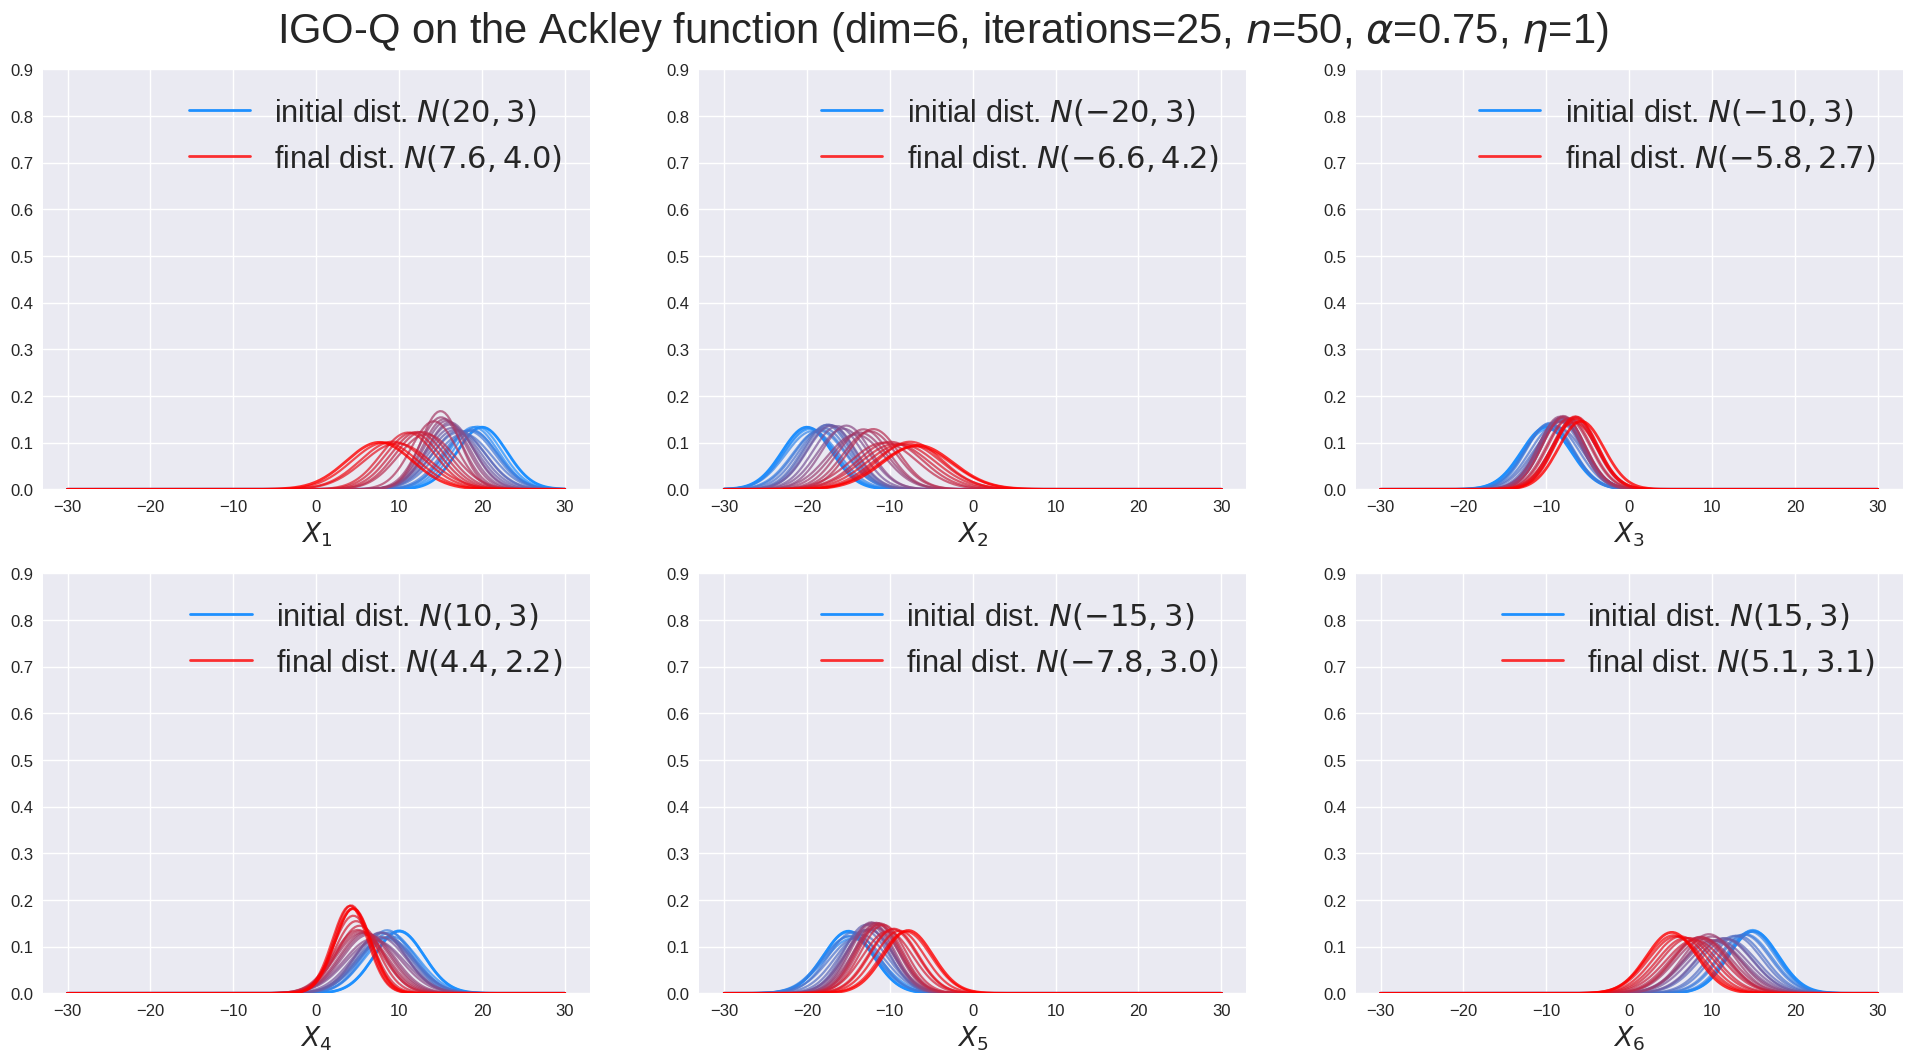

In [5]:
plt.style.use('seaborn-v0_8')

fig, ax = plt.subplots(2, 3, figsize=(24,12))


ax = ax.flatten()

cmap = LinearSegmentedColormap.from_list("custom", ["dodgerblue", "red"])

# set the main title
fig.suptitle(f"IGO-Q on the Ackley function (dim={d}, iterations={nbIter}, $n$={n_k}, $\\alpha$={alpha}, $\eta$={eta})",fontsize=30, y=0.93)

for i in range(d):
    # set x label for each subplots using the inputs variable number
    ax[i].set_xlabel(xlabel=f"$X_{i+1}$", fontsize=19)

    dist_0 = iterations[0]

    marginal_0 = dist_0.marginals[i]
    params = marginal_0.getParameter()

    # set the line space (extra space of eps on each side for visualizing truncation)
    a, b = params[-2], params[-1]
    eps = (b-a)/10
    line = np.linspace(-30, 30, 200)
    ax[i].set_ylim(0, 0.9)

    # plot the nominal distribution
    ax[i].plot(line, [marginal_0.computePDF(x) for x in line], 
               color = 'dodgerblue', label=f"initial dist. $N({mu[i]},{sigma[i]})$", lw=2)

    ax[i].tick_params(axis='x', labelsize=12)
    ax[i].tick_params(axis='y', labelsize=12)


    for k, dist in enumerate(iterations[1:-1]):
        # plot the perturbed distributions
        marginal = dist.marginals[i]
        val = [marginal.computePDF(x) for x in line]
        
        # use iterpolated color
        color = cmap(k/nbIter)
        ax[i].plot(line, val, color=color, alpha=0.7, lw=1.6)

   # plot the final distribution
    dist = iterations[-1]
    marginal = dist.marginals[i]
    val = [marginal.computePDF(x) for x in line]


    m_f = iterations[-1].marginals[i].getParameter()[0]
    s_f = iterations[-1].marginals[i].getParameter()[1]

    ax[i].plot(line, val, color = "red", alpha=0.8, label=f"final dist. $N({m_f:.2},{s_f:.2})$", lw=2)

    ax[i].legend(fontsize=22)

# fig.savefig(f"/home/bketema/Python workspace/Stochastic Optimization/figures_chap_optim/chap_optim_ackley_dim_six.pdf", dpi=600, bbox_inches='tight')


<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_92923/674367008.py:18: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_xlabel(xlabel="$\mu$", fontsize=19)
/tmp/ipykernel_92923/674367008.py:19: SyntaxWarning: invalid escape sequence '\s'
  ax[i].set_ylabel(ylabel="$\sigma$", fontsize=19)
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


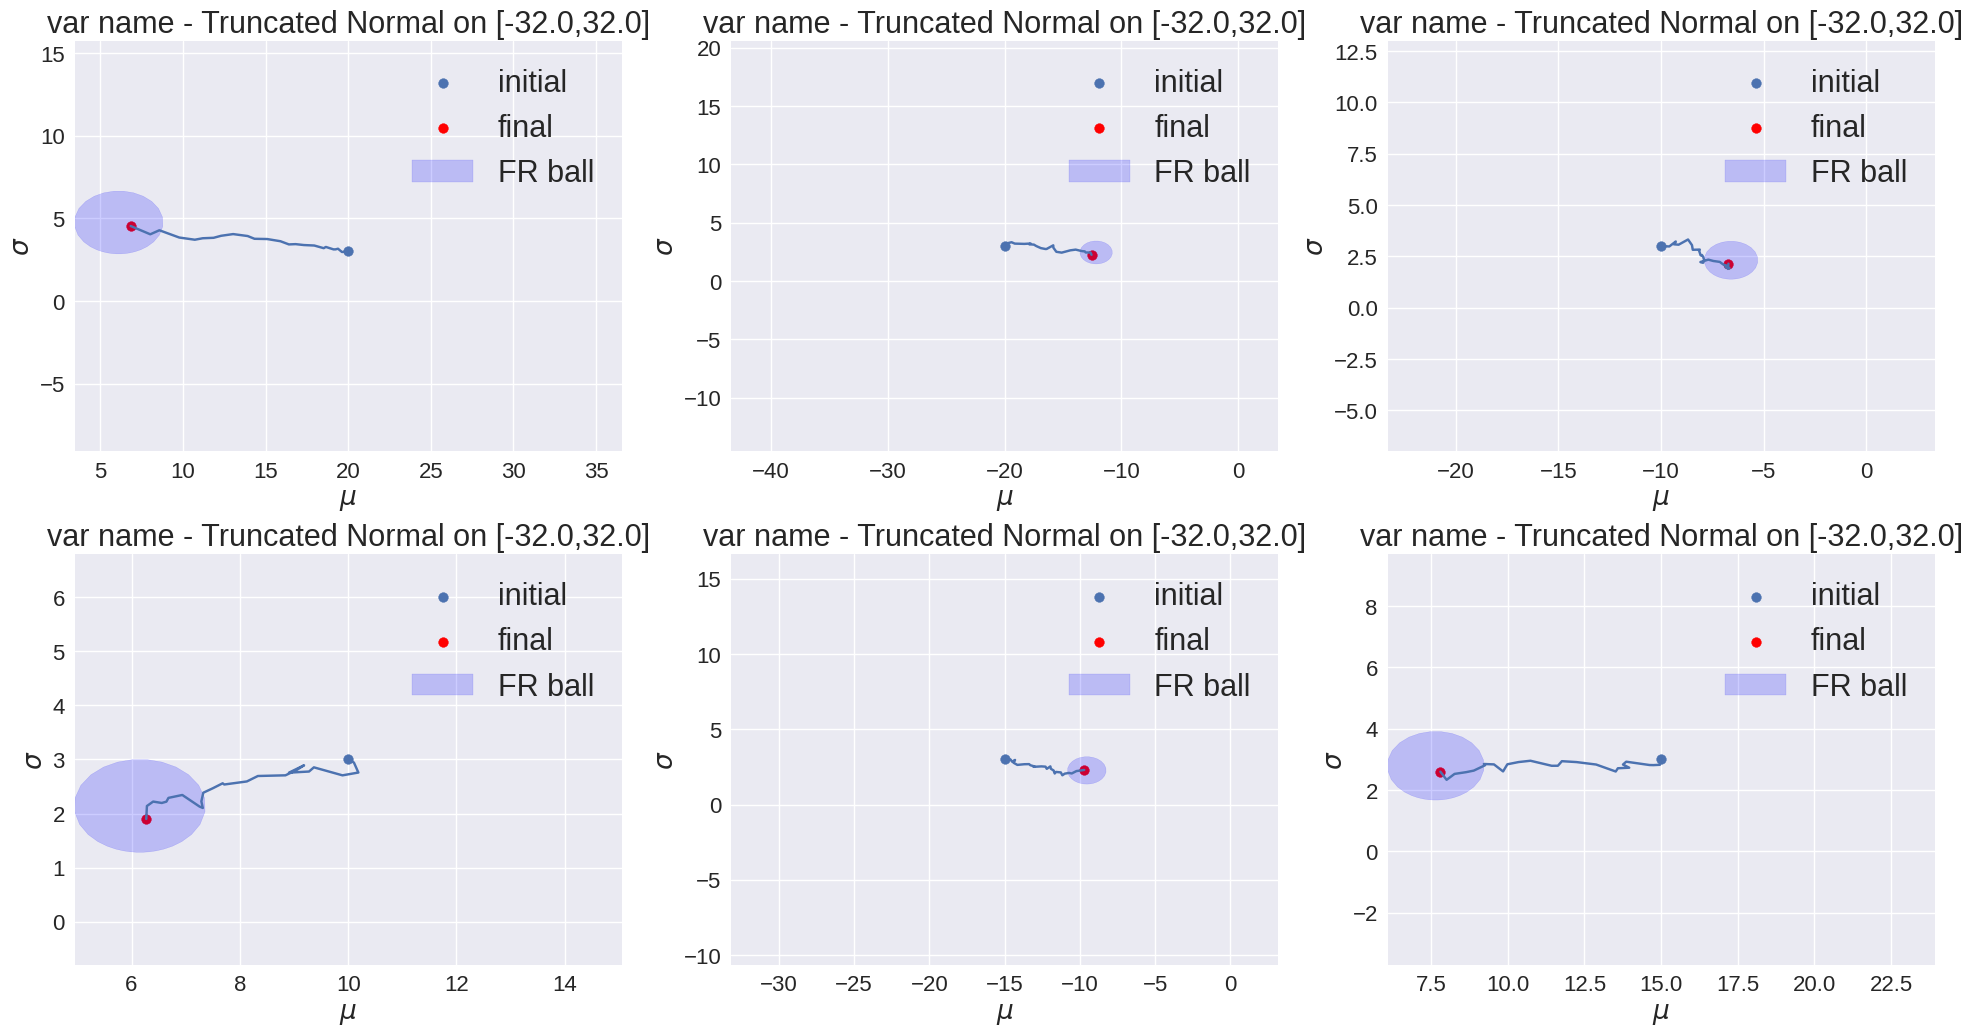

In [68]:
plt.style.use('seaborn-v0_8')

fig, ax = plt.subplots(2, 3, figsize=(24,12))

fig.subplots_adjust(hspace=0.25)  

ax = ax.flatten()

cmap = LinearSegmentedColormap.from_list("custom", ["dodgerblue", "red"])

# set the main title


for i in range(d):
    # set x and ylabels for each subplots
    #if "Normal" in iterations[0].marginals[i]._custom_base_distribution.__class__.__name__:

    ax[i].set_xlabel(xlabel="$\mu$", fontsize=19)
    ax[i].set_ylabel(ylabel="$\sigma$", fontsize=19)

    # set title
    lb = iterations[0].marginals[i].getBounds().getLowerBound()[0]
    ub = iterations[0].marginals[i].getBounds().getUpperBound()[0]
    ax[i].set_title(f"var name - Truncated {iterations[0].marginals[i]._custom_base_distribution.__class__.__name__} on [{lb},{ub}]", fontsize=22)
    dist_0 = iterations[0]

    ithParameterMarginal = np.array([
        iterations[k].marginals[i].getParameter()[0,1] for k in range(nbIter+1)
    ])
    
#    print(ithParameterMarginal[:,0])
    ax[i].scatter(ithParameterMarginal[0,0], ithParameterMarginal[0,1], label="initial")
    ax[i].plot(ithParameterMarginal[:,0], ithParameterMarginal[:,1])
    ax[i].scatter(ithParameterMarginal[-1,0], ithParameterMarginal[-1,1], label="final", color="red")


    # plotting the Fisher-Rao balls on the end points
    final_dist = iterations[-1].marginals[i]

    fisher_sphere_dists = final_dist.sampleFisherRaoSphere(delta=0.6, nbPts=30)
    fisherSphereParameters = []
    for f in fisher_sphere_dists:
        fisherSphereParameters.append(np.array(f.getParameter()[:2]))
    # print("i=", i)
    fisherSphereParameters = np.array(fisherSphereParameters)

    ax[i].fill(fisherSphereParameters[:,0], fisherSphereParameters[:,1], color="blue", alpha=0.2, label="FR ball")

    # correcting the framing of the curves
    mu_0, sigma_0 = ithParameterMarginal[0,0], ithParameterMarginal[0,1]
    
    conc_x = np.concatenate((ithParameterMarginal[:,0], fisherSphereParameters[:,0]))
    conc_y = np.concatenate((ithParameterMarginal[:,1], fisherSphereParameters[:,1]))

    # print(ithParameterMarginal[:,0])
    # print(fisherSphereParameters[:,0])

    spread_x = max(mu_0 - np.min(conc_x), np.max(conc_y)-mu_0)
    spread_y = max(sigma_0 - np.min(conc_y), np.max(conc_y) - sigma_0)

    # s = max(spread_x, spread_y)
    # must depend on i
    scale = 1

    ax[i].axis('equal')
    ax[i].set_xlim(mu_0 - spread_x*scale, mu_0 + spread_x*scale)
    ax[i].set_ylim(max(0, sigma_0 - spread_y*scale), sigma_0 + spread_y*scale)

#     # plot the nominal distribution
#     ax[i].plot(line, [marginal_0.computePDF(x) for x in line], 
#                color = 'dodgerblue', label=f"initial dist. $N({mu[i]},{sigma[i]})$", lw=2)

    ax[i].tick_params(axis='x', labelsize=16)
    ax[i].tick_params(axis='y', labelsize=16)


#    # plot the final distribution
#     dist = iterations[-1]
#     marginal = dist.marginals[i]
#     val = [marginal.computePDF(x) for x in line]


#     m_f = iterations[-1].marginals[i].getParameter()[0]
#     s_f = iterations[-1].marginals[i].getParameter()[1]

#     ax[i].plot(line, val, color = "red", alpha=0.8, label=f"final dist. $N({m_f:.2},{s_f:.2})$", lw=2)

    ax[i].legend(fontsize=22)

# fig.savefig(f"/home/bketema/Python workspace/Stochastic Optimization/figures_chap_optim/chap_optim_ackley_dim_six.pdf", dpi=600, bbox_inches='tight')

In [54]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.collections import LineCollection
# from matplotlib.colors import Normalize

# # Data
# x = np.linspace(0, 10, 500)
# y = np.sin(x)

# # Create line segments
# points = np.array([x, y]).T.reshape(-1, 1, 2)
# segments = np.concatenate([points[:-1], points[1:]], axis=1)

# # Create a colormap based on x (or y or any function)
# norm = Normalize(vmin=x.min(), vmax=x.max())
# cmap = plt.get_cmap('plasma')

# # Create line collection
# lc = LineCollection(segments, cmap=cmap, norm=norm)
# lc.set_array(x)          # color values along the line
# lc.set_linewidth(2)

# # Plot
# fig, ax = plt.subplots(figsize=(7, 4))
# ax.add_collection(lc)
# ax.autoscale()
# ax.set_xlim(x.min(), x.max())
# ax.set_ylim(y.min(), y.max())

# plt.colorbar(lc, ax=ax, label="x-value")
# plt.title("Single Line with Gradient Color")
# plt.show()

tr = TruncatedDistribution(LogNormal(2, 1), ot.Interval(2, 3))
tr.sampleFisherRaoSphere(nbPts=10, delta=0.5)


TypeError: LogNormal._sampleFisherRaoSphereTrCase() takes 4 positional arguments but 5 were given

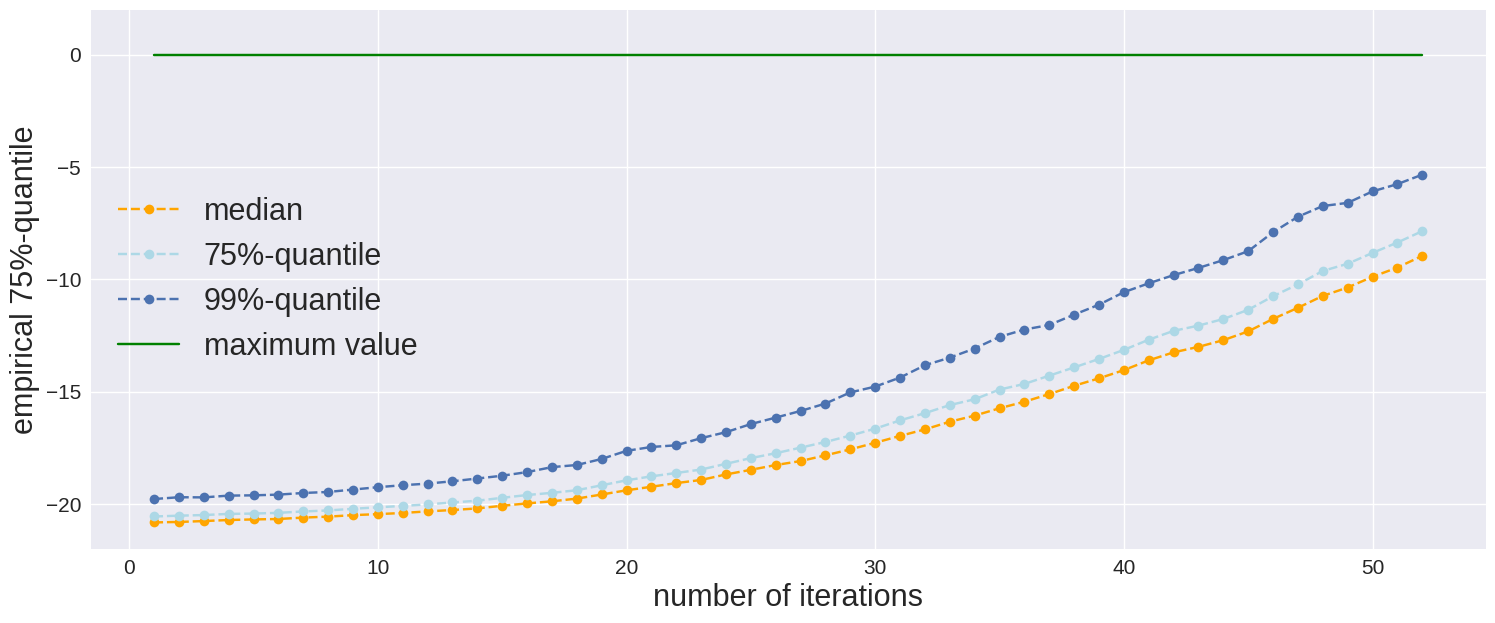

In [ ]:

medians = []
quartiles= []
extquantiles = []
for f in iterations:
    s = f.getSample(6000)
    output = np.array(ackleyOT(s)).transpose()[0]
    medians.append(np.quantile(output, 0.5))
    quartiles.append(np.quantile(output, 0.75))
    extquantiles.append(np.quantile(output, 0.99))



# plot the results
plt.figure(figsize=(18, 7))
# plt.grid(True)
arange = np.arange(1, len(iterations)+1)
plt.plot(arange, medians, "o--",label="median", color="orange")
plt.plot(arange, quartiles, "o--", label=f"{int(75)}%-quantile", color="lightblue")
plt.plot(arange, extquantiles, "o--", label=f"{int(99)}%-quantile")


plt.plot(arange, np.zeros(len(iterations)), label="maximum value", color="green")
#plt.set_title(f"Evolution of empirical mean and {int(95)}%-quantile along the iterates", fontsize=30)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.ylim(-22, 2)
plt.xlabel(xlabel="number of iterations", fontsize=22)
plt.ylabel(ylabel=f"empirical {int(alpha*100)}%-quantile", fontsize=22)

plt.legend(fontsize=22)
plt.savefig(f"/home/bketema/Python workspace/Stochastic Optimization/figures_chap_optim/chap_optim_ackley_dim_six_quantile_curve.pdf", dpi=600, bbox_inches='tight')



In [ ]:
alpha = 0.95
nbIter = 100
n_k = 100
eta = 1

dim = [2, 3, 4, 5, 10, 20]
Iterations = []

# iterate over the dimension
for d in dim:
    # wrap the ackley function on dim=d as an ot function
    ackleyOT = ot.PythonFunction(d, 1, lambda x: ackley(x, d=d))

    # define the input distributions
    inputdesc = [f'X_{i}' for i in range(d)]
    marginals = []

    mu = [20]*d
    sigma = [3]*d
    # build the marginals
    for i in range(d):
        dist = TruncatedDistribution(Normal(mu[i], sigma[i]), ot.Interval(-32, 32))
        dist.setDescription([inputdesc[i]])
        marginals.append(dist)

    # build the full distribution
    fulldist = JointDistribution(marginals, ot.IndependentCopula(int(d)))
    fulldist.setDescription(inputdesc)

    # define the optimization problem and solve it using IGO-Q
    acklyOptProblem = RiemannianStochasticOptimization(ackleyOT, fulldist, inputdesc, inputdesc)
    iterations, _, _, _, _ = acklyOptProblem.naturalEvolutionStrategy("IGO_Q", eta=eta, fitnessParameter=alpha, nbIter=nbIter, n=n_k)

    Iterations.append(iterations)

computing output values...

output values =
       [ y0       ]
 0 : [ -21.7974 ]
 1 : [ -21.4593 ]
 2 : [ -21.3765 ]
 3 : [ -22.0347 ]
 4 : [ -21.0583 ]
 5 : [ -21.5294 ]
 6 : [ -21.2871 ]
 7 : [ -21.3194 ]
 8 : [ -20.9127 ]
 9 : [ -20.5919 ]
10 : [ -21.9516 ]
11 : [ -21.6051 ]
12 : [ -19.998  ]
13 : [ -21.2924 ]
14 : [ -21.7588 ]
15 : [ -20.9121 ]
16 : [ -21.1171 ]
17 : [ -21.497  ]
18 : [ -21.9642 ]
19 : [ -21.5029 ]
20 : [ -21.6707 ]
21 : [ -21.3823 ]
22 : [ -21.021  ]
23 : [ -21.3251 ]
24 : [ -20.6043 ]
25 : [ -20.9367 ]
26 : [ -22.0553 ]
27 : [ -21.7683 ]
28 : [ -21.8245 ]
29 : [ -21.6088 ]
30 : [ -21.6639 ]
31 : [ -21.2693 ]
32 : [ -20.1245 ]
33 : [ -21.2163 ]
34 : [ -20.3628 ]
35 : [ -20.7877 ]
36 : [ -22.1049 ]
37 : [ -21.6462 ]
38 : [ -21.419  ]
39 : [ -20.8795 ]
40 : [ -19.8267 ]
41 : [ -21.2495 ]
42 : [ -19.6499 ]
43 : [ -21.0203 ]
44 : [ -21.609  ]
45 : [ -20.8161 ]
46 : [ -21.5929 ]
47 : [ -21.5366 ]
48 : [ -21.8684 ]
49 : [ -21.7504 ]
50 : [ -21.3642 ]
51 : [ -21.8737 ]


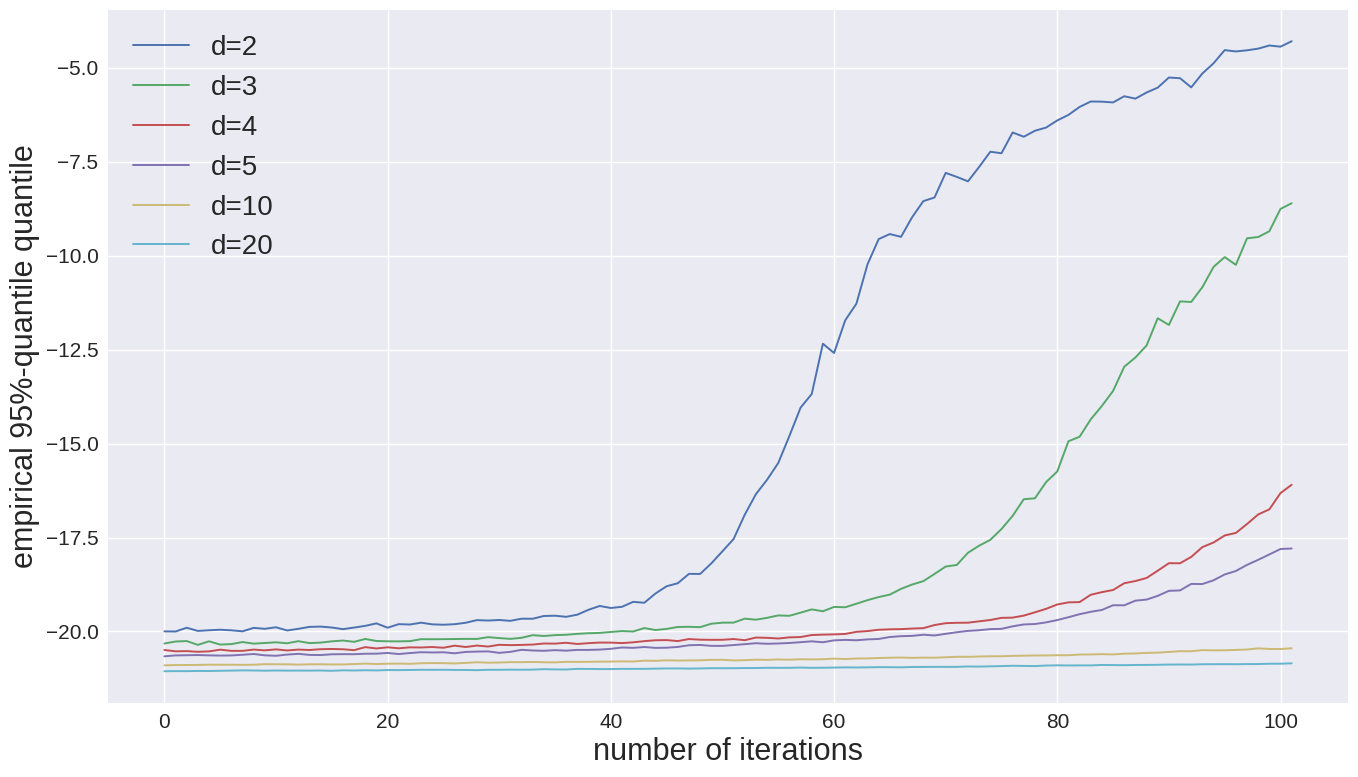

In [ ]:
plt.style.use('seaborn-v0_8')

plt.figure(figsize=(16, 9))
for i, d in enumerate([2, 3, 4, 5, 10, 20]):
    # extract the iterations at a given dimension
    iters = Iterations[i]

    # build the d-dimensional ackley function
    ackleyOT = ot.PythonFunction(d, 1, lambda x: ackley(x, d=d))

    quantiles = []
    for f in iters:
        s = f.getSample(d*1000)
        output = np.array(ackleyOT(s))

        quantiles.append(np.quantile(output, alpha))

    plt.plot(np.arange(0, nbIter+2, 1), quantiles, label=f'd={d}', lw=1.4)

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.xlabel(xlabel="number of iterations", fontsize=22)
plt.ylabel(ylabel=r"empirical 95%-quantile", fontsize=22)

plt.legend(fontsize=20)
plt.savefig(f"/home/bketema/Python workspace/Stochastic Optimization/figures_chap_optim/plots_2.pdf", dpi=600, bbox_inches='tight')
